**Importing Libraries**

In [1]:
# Include Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import scale

**Loading and merging DataSets**

In [2]:
#Create dataframes for each indices
df_dji = pd.read_csv('Processed_DJI.csv',parse_dates=['Date'])
df_russel = pd.read_csv('Processed_RUSSELL.csv',parse_dates=['Date'])
df_sp = pd.read_csv('Processed_S&P.csv',parse_dates=['Date'])
df_nyse = pd.read_csv('Processed_NYSE.csv',parse_dates=['Date'])
df_nasdaq = pd.read_csv('Processed_NASDAQ.csv',parse_dates=['Date'])

In [3]:
#merging all the datasets in one dataframe for ease of pre processing

def merge_datasets(dataframes):
    # Concatenate all dataframes in the list into one
    merged_df = pd.concat(dataframes, ignore_index=True)

    return merged_df

dataframes = [df_dji, df_nasdaq, df_nyse, df_russel, df_sp]

# Call the function and store the merged dataframe
df_merged = merge_datasets(dataframes)

#Count the number of records by Name
records_by_name = df_merged.groupby('Name').size().reset_index(name='Count')

# This will show the count of records for each market
print(records_by_name)

     Name  Count
0     DJI   1984
1  NASDAQ   1984
2     NYA   1984
3     RUT   1984
4     S&P   1984


In [4]:
df_merged.columns

Index(['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200',
       'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA',
       'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM',
       'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'GSPC', 'HSI', 'IXIC',
       'SSEC', 'RUT', 'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2',
       'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent',
       'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F',
       'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD',
       'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F',
       'Dollar index', 'wheat-F', 'XAG', 'XAU', 'DJI', 'S&P'],
      dtype='object')

**Exploratory Data Analysis , Data Preprocessing and feature engineering**

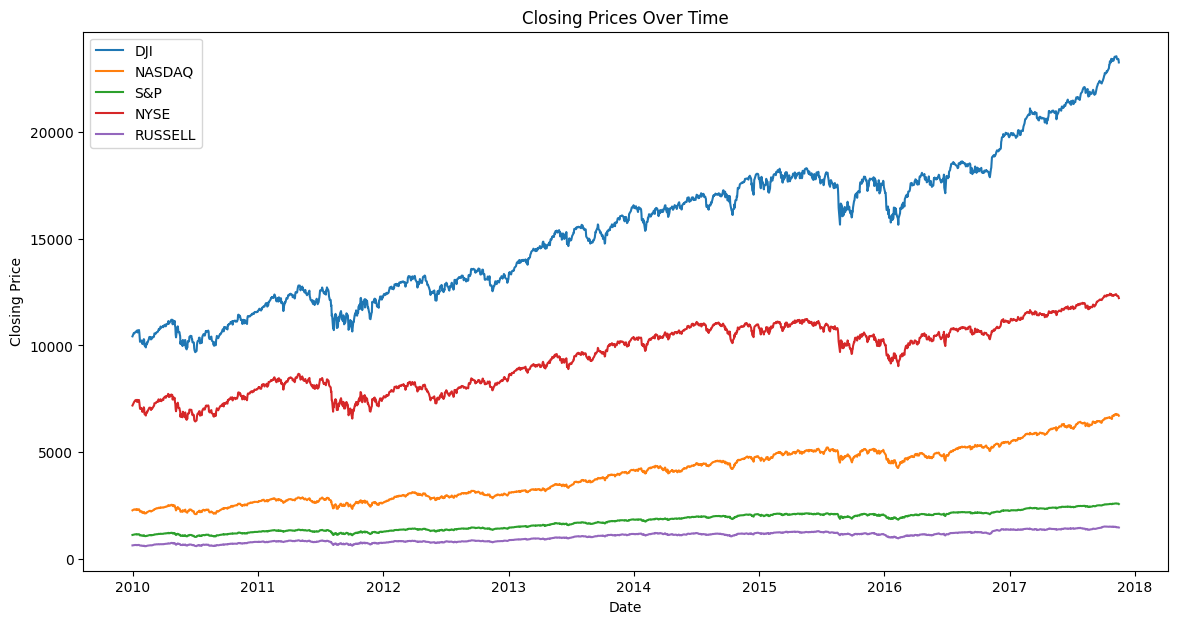

In [5]:
plt.figure(figsize=(14, 7))
for index, df in [('DJI', df_dji), ('NASDAQ', df_nasdaq), ('S&P', df_sp), ('NYSE', df_nyse), ('RUSSELL', df_russel)]:
    plt.plot(df['Date'], df['Close'], label=index)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [6]:
# Display the first few rows of the DataFrame to understand the data
print(df_merged.head())

# Summary statistics for numerical features
print(df_merged.describe())

# Check for missing values
print(df_merged.isnull().sum())

# Count the number of unique values for each column
print(df_merged.nunique())


        Date         Close    Volume       mom      mom1      mom2      mom3  \
0 2009-12-31  10428.049805       NaN       NaN       NaN       NaN       NaN   
1 2010-01-04  10583.959961       NaN  0.014951       NaN       NaN       NaN   
2 2010-01-05  10572.019531       NaN -0.001128  0.014951       NaN       NaN   
3 2010-01-06  10573.679688  0.515598  0.000157 -0.001128  0.014951       NaN   
4 2010-01-07  10606.860352  9.776045  0.003138  0.000157 -0.001128  0.014951   

   ROC_5  ROC_10  ROC_15  ...  RUSSELL-F  S&P-F   CHF  Dollar index-F  \
0    NaN     NaN     NaN  ...      -1.08  -1.00 -0.11           -0.08   
1    NaN     NaN     NaN  ...       1.61   1.62 -0.57           -0.59   
2    NaN     NaN     NaN  ...      -0.20   0.31  0.43            0.03   
3    NaN     NaN     NaN  ...      -0.02   0.07 -0.56           -0.24   
4    NaN     NaN     NaN  ...       0.50   0.40  0.58            0.58   

   Dollar index  wheat-F   XAG   XAU  DJI  S&P  
0         -0.06    -0.48  0.30 

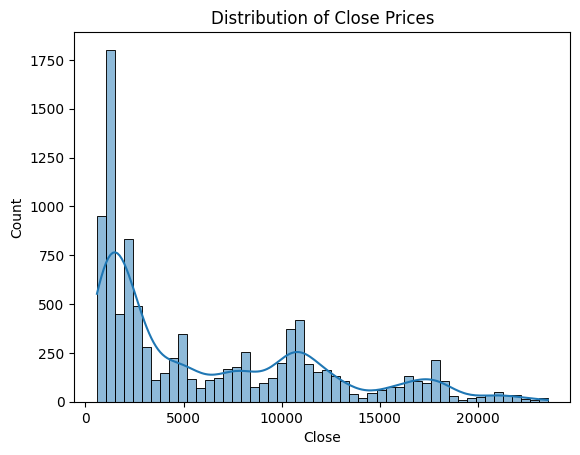

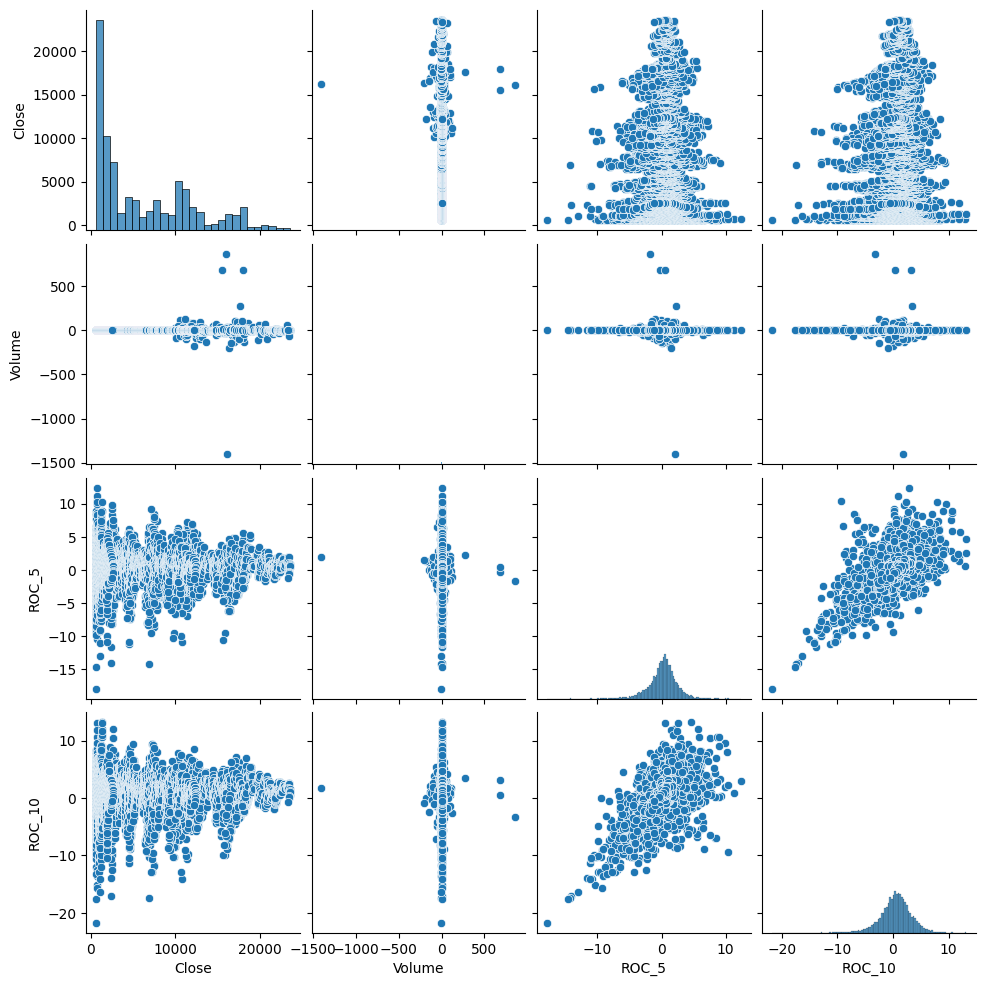

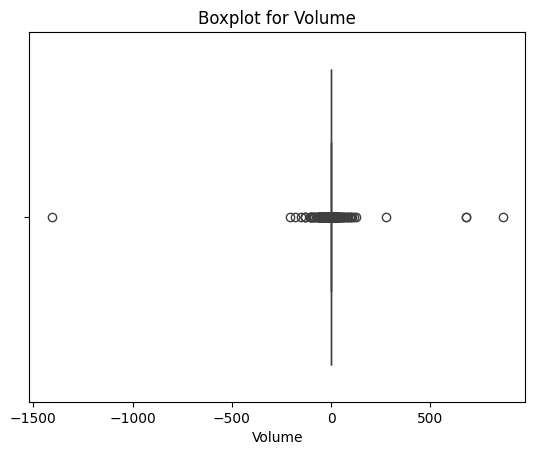

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the 'Close' prices (or any other relevant feature)
sns.histplot(df_merged['Close'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.show()

# Pairplot for a subset of features (this can be resource-intensive with many features)
# Replace ['Feature1', 'Feature2', 'Feature3'] with your actual feature names
sns.pairplot(df_merged[['Close', 'Volume', 'ROC_5', 'ROC_10']])
plt.show()



# Boxplot for volume (or other features to check for outliers)
sns.boxplot(x=df_merged['Volume'])
plt.title('Boxplot for Volume')
plt.show()


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_merged['Close_scaled'] = scaler.fit_transform(df_merged[['Close']])



In [9]:
# Remove top 1% and bottom 1% of the Volume column
q_low = df_merged['Volume'].quantile(0.01)
q_hi  = df_merged['Volume'].quantile(0.99)

df_merged = df_merged[(df_merged['Volume'] < q_hi) & (df_merged['Volume'] > q_low)]


In [10]:
# Apply a log transformation to 'Close' to reduce skewness
import numpy as np

# Adding a small constant to avoid log(0) which is undefined
df_merged['Close_log'] = np.log(df_merged['Close'] + 1)


<ipython-input-10-1715c0b0d5b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Close_log'] = np.log(df_merged['Close'] + 1)


In [11]:
# Fill missing 'Volume' values with the median of the column
df_merged['Volume'].fillna(df_merged['Volume'].median(), inplace=True)


<ipython-input-11-5909e3639e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Volume'].fillna(df_merged['Volume'].median(), inplace=True)


In [12]:
# Creating a new feature as a ratio of 'Close' to 'Volume'
df_merged['close_to_volume_ratio'] = df_merged['Close'] / df_merged['Volume']

# Creating a feature that captures day of the week from 'Date'
df_merged['day_of_week'] = pd.to_datetime(df_merged['Date']).dt.dayofweek


<ipython-input-12-a2032dfcc202>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['close_to_volume_ratio'] = df_merged['Close'] / df_merged['Volume']
<ipython-input-12-a2032dfcc202>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['day_of_week'] = pd.to_datetime(df_merged['Date']).dt.dayofweek


In [13]:
df_merged['EMA_10'].fillna(method='ffill', inplace=True)
df_merged['EMA_10'].fillna(method='bfill', inplace=True)
df_merged['EMA_20'].fillna(method='ffill', inplace=True)
df_merged['EMA_20'].fillna(method='bfill', inplace=True)
df_merged['EMA_50'].fillna(method='ffill', inplace=True)
df_merged['EMA_50'].fillna(method='bfill', inplace=True)
df_merged['EMA_200'].fillna(method='ffill', inplace=True)
df_merged['EMA_200'].fillna(method='bfill', inplace=True)

# For other features with missing values, you may choose to fill with median or mean
other_features = ['mom1', 'mom2', 'mom3', 'ROC_5', 'ROC_10', 'ROC_15', 'ROC_20']
df_merged.loc[:,other_features] = df_merged.loc[:,other_features].apply(lambda x: x.fillna(x.median()))

<ipython-input-13-e6491f80ebd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['EMA_10'].fillna(method='ffill', inplace=True)
<ipython-input-13-e6491f80ebd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['EMA_10'].fillna(method='bfill', inplace=True)
<ipython-input-13-e6491f80ebd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['EMA_20'].fillna(method='ffill', inplace=True)
<ipython-input-13-e6491f8

In [14]:
# Drop columns with high proportions of missing data
columns_with_high_na = ['S&P', 'IXIC', 'RUT', 'NYSE', 'GBP', 'JPY', 'CAD', 'CNY']
df_merged.drop(columns=columns_with_high_na, inplace=True)


<ipython-input-14-e842991b9225>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.drop(columns=columns_with_high_na, inplace=True)


In [15]:
# Convert 'Date' to datetime if it's not already
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Set 'Date' as the index of the DataFrame
df_merged.set_index('Date', inplace=True)
# Sort the DataFrame by the index (Date)
df_merged.sort_index(inplace=True)

# Now try interpolating again
indices_with_na = ['FCHI', 'FTSE', 'GDAXI', 'HSI-F', 'KOSPI-F', 'CAC-F', 'DAX-F', 'FTSE-F']
df_merged[indices_with_na] = df_merged[indices_with_na].interpolate(method='time')

<ipython-input-15-e01b51c4f74d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Date'] = pd.to_datetime(df_merged['Date'])
<ipython-input-15-e01b51c4f74d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.sort_index(inplace=True)
<ipython-input-15-e01b51c4f74d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [16]:
#Interpolating the missing values for stock indices and other financial series
columns_to_interpolate = ['GSPC', 'HSI', 'SSEC', 'DJI']
df_merged[columns_to_interpolate] = df_merged[columns_to_interpolate].interpolate(method='linear')

# Check if all missing values have been addressed
print(df_merged[columns_to_interpolate].isnull().sum())


GSPC    3
HSI     4
SSEC    4
DJI     0
dtype: int64


<ipython-input-16-35d27fc4b36f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged[columns_to_interpolate] = df_merged[columns_to_interpolate].interpolate(method='linear')


In [17]:
# Reapply interpolation with a more permissive method
df_merged['GSPC'] = df_merged['GSPC'].interpolate(method='linear')

# Use forward and backward fill to cover the remaining ends if needed
df_merged['GSPC'].fillna(method='ffill', inplace=True)
df_merged['GSPC'].fillna(method='bfill', inplace=True)

# Reapply interpolation with a more permissive method
df_merged['HSI'] = df_merged['HSI'].interpolate(method='linear')

# Use forward and backward fill to cover the remaining ends if needed
df_merged['HSI'].fillna(method='ffill', inplace=True)
df_merged['HSI'].fillna(method='bfill', inplace=True)

# Reapply interpolation with a more permissive method
df_merged['SSEC'] = df_merged['GSPC'].interpolate(method='linear')

# Use forward and backward fill to cover the remaining ends if needed
df_merged['SSEC'].fillna(method='ffill', inplace=True)
df_merged['SSEC'].fillna(method='bfill', inplace=True)



<ipython-input-17-a09e12242846>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['GSPC'] = df_merged['GSPC'].interpolate(method='linear')
<ipython-input-17-a09e12242846>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['GSPC'].fillna(method='ffill', inplace=True)
<ipython-input-17-a09e12242846>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['GSPC']

In [18]:
# Replace infinities with NaN
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now you can choose to fill these NaNs with a statistical measure such as median
df_merged['close_to_volume_ratio'] = df_merged['close_to_volume_ratio'].fillna(df_merged['close_to_volume_ratio'].median())

In [19]:
df_merged['wheat-F'].fillna(df_merged['wheat-F'].median(), inplace=True)

In [20]:
# Using median to fill the missing values
df_merged['FTSE'].fillna(df_merged['FTSE'].median(), inplace=True)
df_merged['GDAXI'].fillna(df_merged['GDAXI'].median(), inplace=True)



In [21]:
for column in df_merged.columns:
    missing_count = df_merged[column].isna().sum()
    print(f"Number of missing values in {column}: {missing_count}")

Number of missing values in Close: 0
Number of missing values in Volume: 0
Number of missing values in mom: 0
Number of missing values in mom1: 0
Number of missing values in mom2: 0
Number of missing values in mom3: 0
Number of missing values in ROC_5: 0
Number of missing values in ROC_10: 0
Number of missing values in ROC_15: 0
Number of missing values in ROC_20: 0
Number of missing values in EMA_10: 0
Number of missing values in EMA_20: 0
Number of missing values in EMA_50: 0
Number of missing values in EMA_200: 0
Number of missing values in DTB4WK: 0
Number of missing values in DTB3: 0
Number of missing values in DTB6: 0
Number of missing values in DGS5: 0
Number of missing values in DGS10: 0
Number of missing values in Oil: 0
Number of missing values in Gold: 0
Number of missing values in DAAA: 0
Number of missing values in DBAA: 0
Number of missing values in AAPL: 0
Number of missing values in AMZN: 0
Number of missing values in GE: 0
Number of missing values in JNJ: 0
Number of m

In [22]:
df_merged['SMA_20'] = df_merged['Close'].rolling(window=20).mean()  # 20-day simple moving average

In [23]:
# Check the summary statistics for the new DataFrame
print(df_merged.describe())


              Close       Volume          mom         mom1         mom2  \
count   9713.000000  9713.000000  9713.000000  9713.000000  9713.000000   
mean    6137.406719    -0.075015     0.000492     0.000458     0.000481   
std     5602.291013     1.275218     0.010330     0.010355     0.010354   
min      586.489990   -11.525800    -0.089095    -0.089095    -0.089095   
25%     1373.300049    -0.131665    -0.004041    -0.004079    -0.004009   
50%     3589.090088    -0.016565     0.000685     0.000662     0.000685   
75%    10429.599609     0.088375     0.005616     0.005600     0.005603   
max    23563.359375    10.323216     0.069436     0.069436     0.069436   

              mom3        ROC_5       ROC_10       ROC_15       ROC_20  ...  \
count  9713.000000  9713.000000  9713.000000  9713.000000  9713.000000  ...   
mean      0.000470     0.232002     0.456834     0.689477     0.926323  ...   
std       0.010359     2.194890     2.885219     3.495359     3.933725  ...   
min     

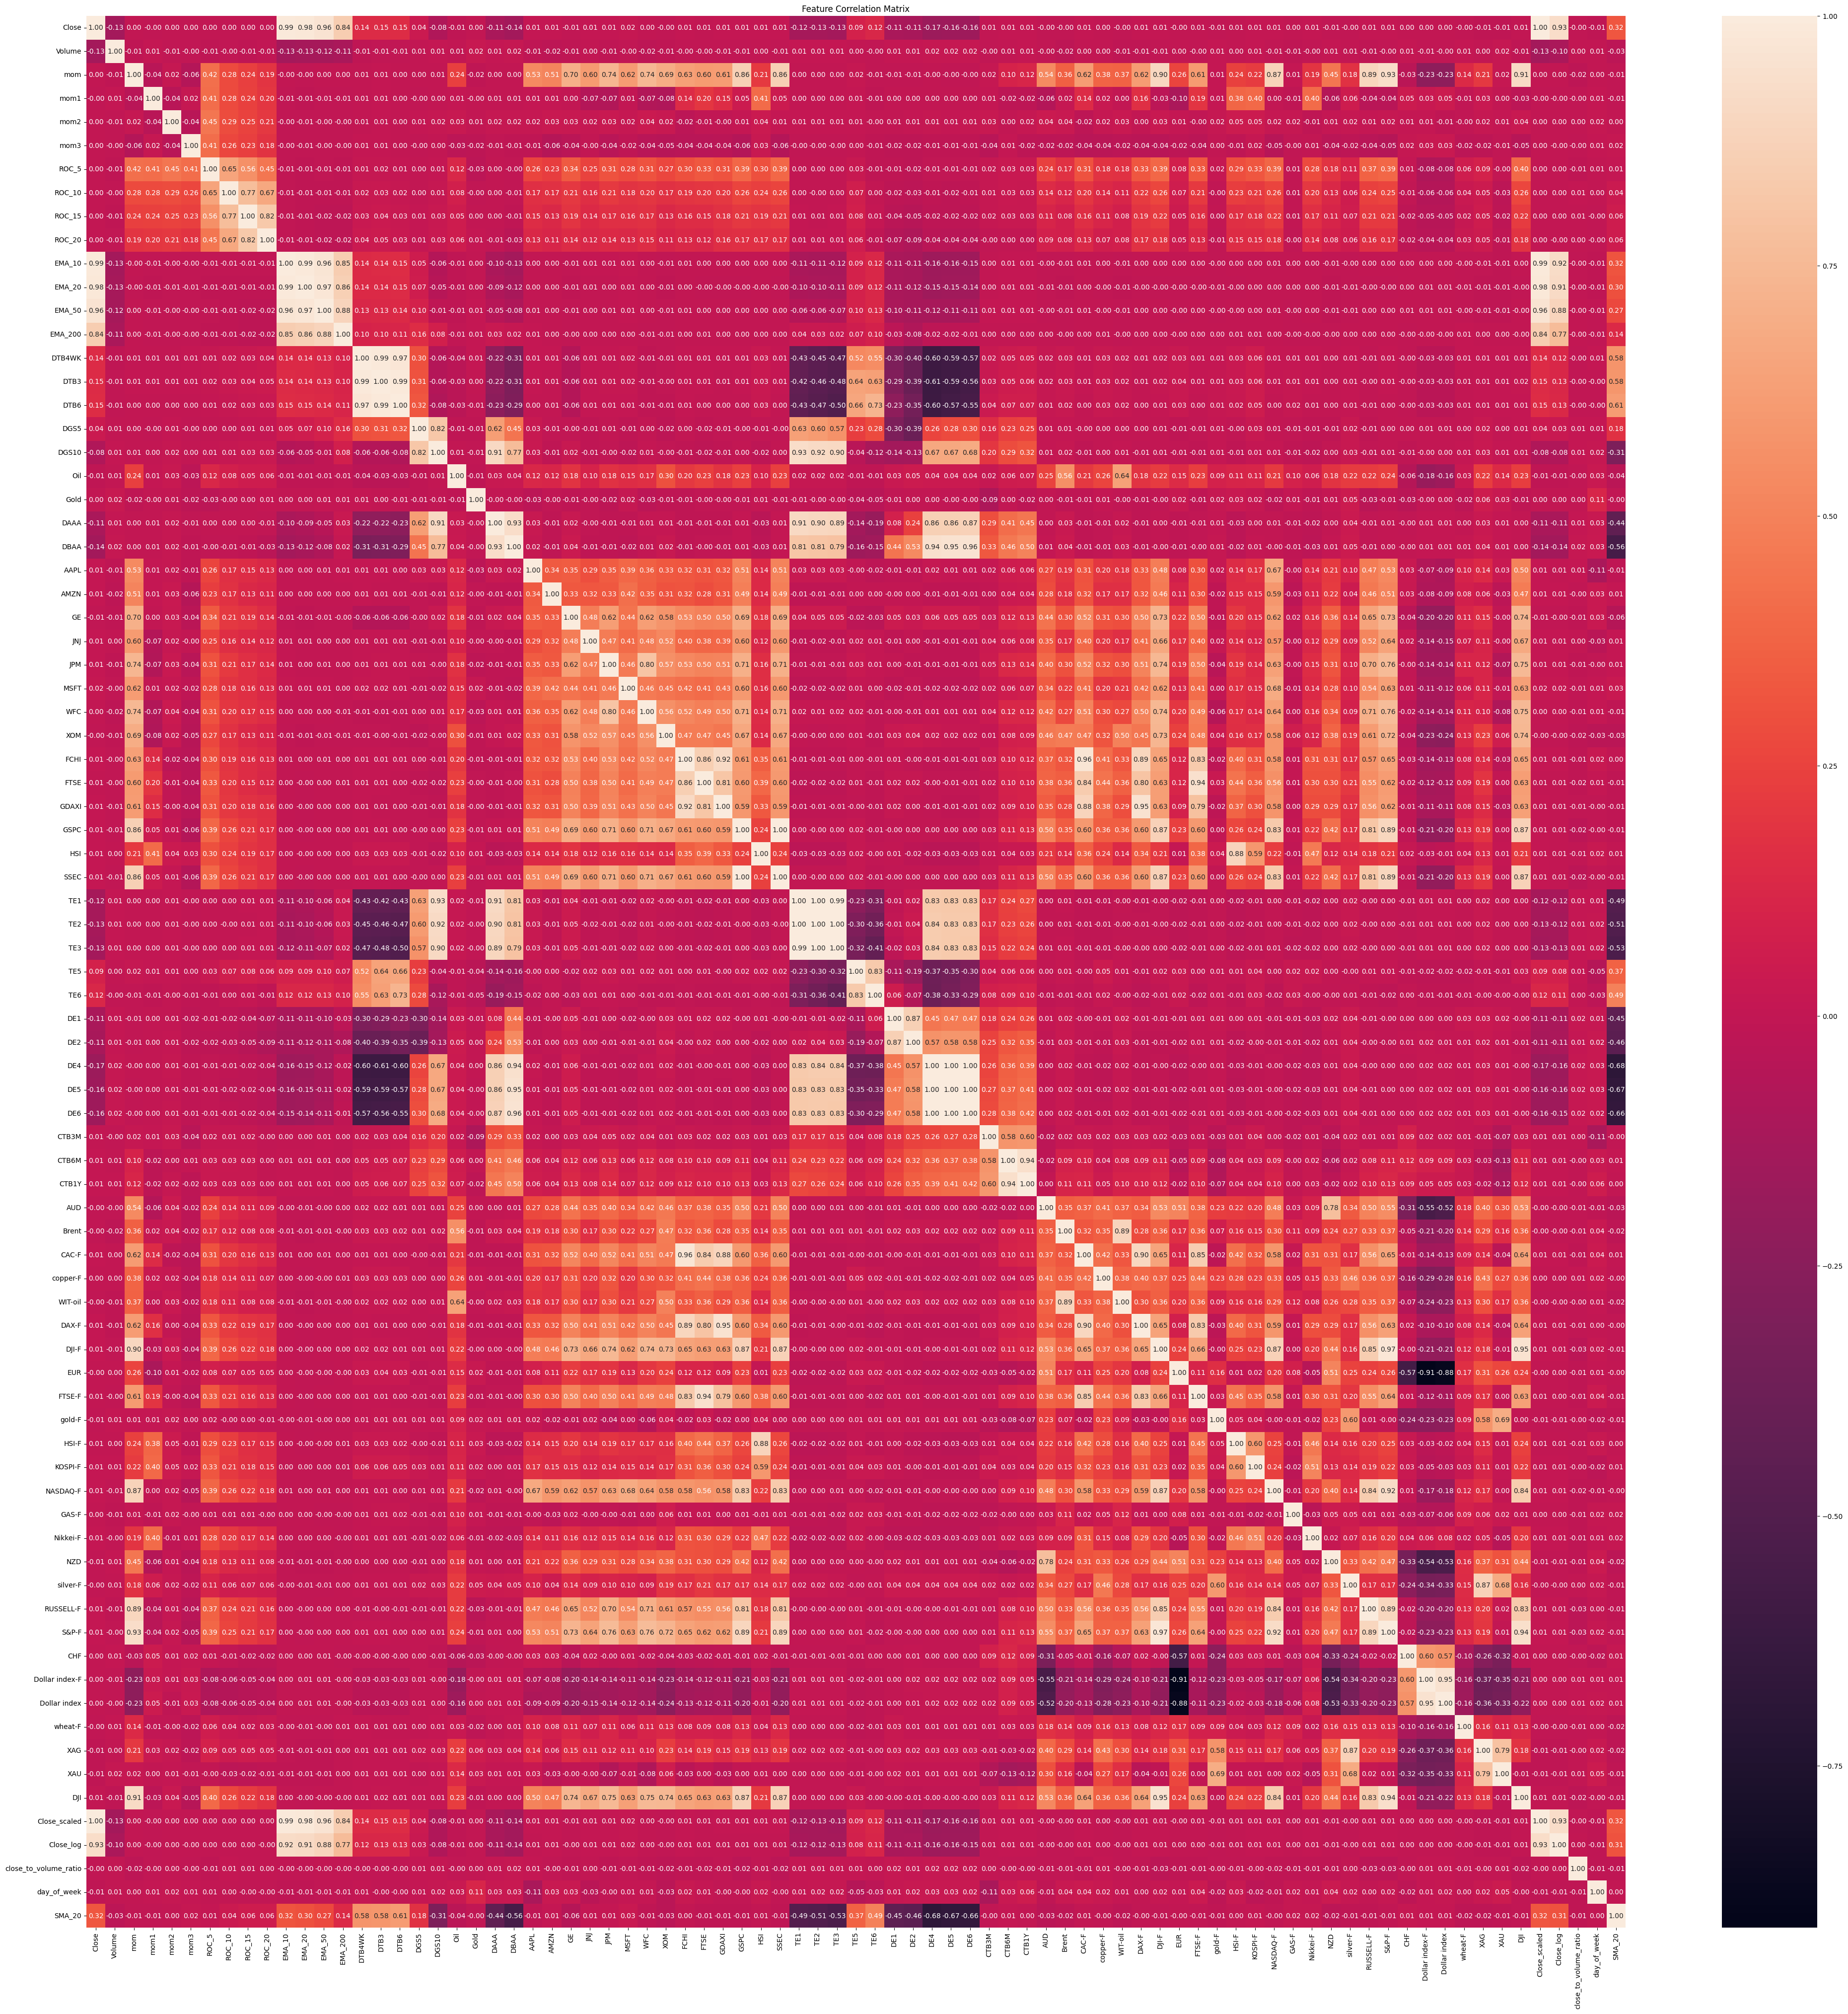

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is your DataFrame
# Exclude non-numeric columns before calculating correlation
numeric_df = df_merged.select_dtypes(include=[np.number])

# Handling missing data: you can fill missing values with the mean or median if suitable
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Now you can plot the correlation matrix
plt.figure(figsize=(50,50))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

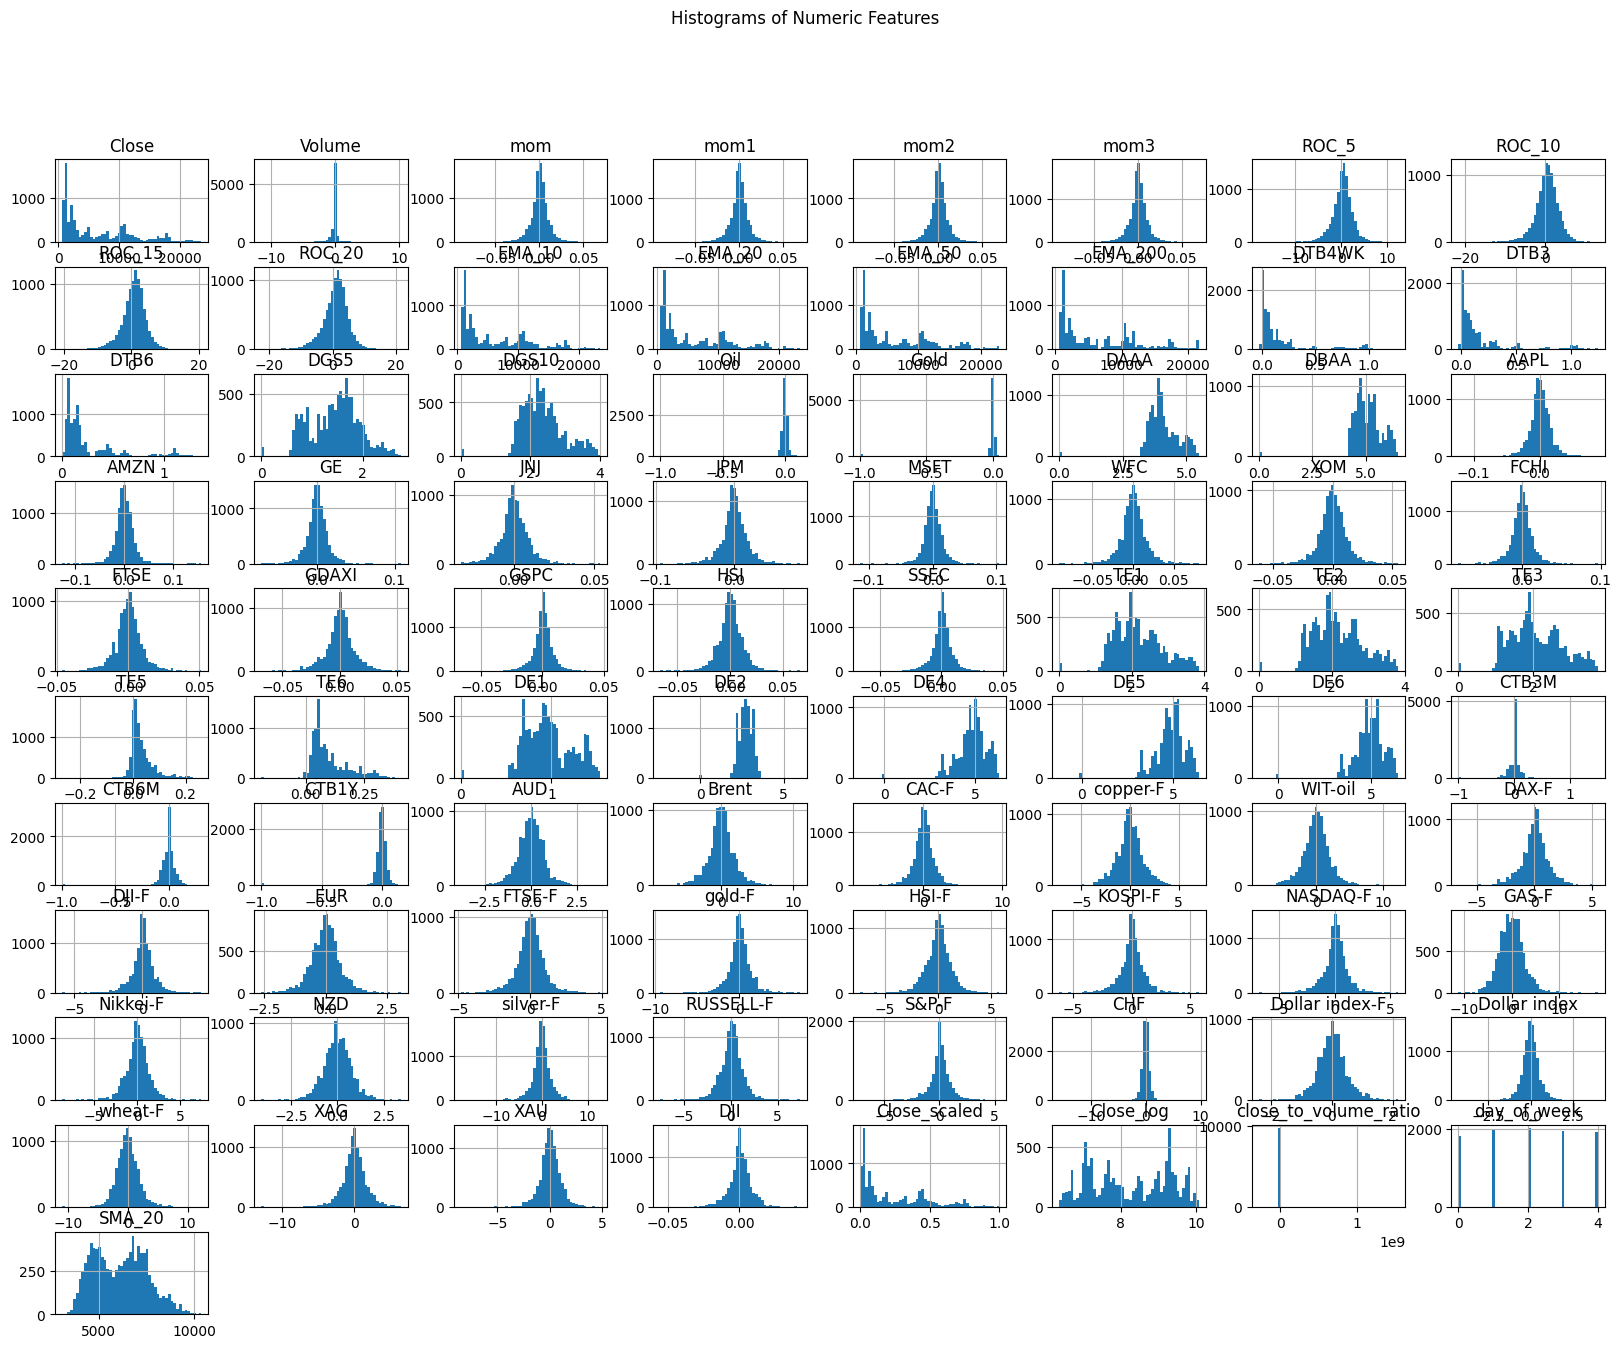

              Close       Volume          mom         mom1         mom2  \
count   9713.000000  9713.000000  9713.000000  9713.000000  9713.000000   
mean    6137.406719    -0.075015     0.000492     0.000458     0.000481   
std     5602.291013     1.275218     0.010330     0.010355     0.010354   
min      586.489990   -11.525800    -0.089095    -0.089095    -0.089095   
25%     1373.300049    -0.131665    -0.004041    -0.004079    -0.004009   
50%     3589.090088    -0.016565     0.000685     0.000662     0.000685   
75%    10429.599609     0.088375     0.005616     0.005600     0.005603   
max    23563.359375    10.323216     0.069436     0.069436     0.069436   

              mom3        ROC_5       ROC_10       ROC_15       ROC_20  ...  \
count  9713.000000  9713.000000  9713.000000  9713.000000  9713.000000  ...   
mean      0.000470     0.232002     0.456834     0.689477     0.926323  ...   
std       0.010359     2.194890     2.885219     3.495359     3.933725  ...   
min     

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is your DataFrame and it's already cleaned from non-numeric issues.

# Select numeric columns
numeric_columns = df_merged.select_dtypes(include=[np.number])

# Histograms for each numeric feature
numeric_columns.hist(figsize=(20, 15), bins=50, layout=(11, 8))
plt.suptitle('Histograms of Numeric Features')
plt.show()



# Descriptive statistics
desc_stats = numeric_columns.describe()
print(desc_stats)


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models



# Assuming 'df_merged' is your DataFrame and 'Close' is the closing price of the index to predict
# First, create the target variable 'y' by comparing the close price with the previous day's close price
df_merged['target'] = (df_merged['Close'] > df_merged['Close'].shift(1)).astype(int)

# Drop the first row since it will have a NaN value after the shift operation
df_merged.dropna(subset=['target'], inplace=True)

# Define your features (excluding 'target')
features = df_merged.select_dtypes(include=['int64', 'float64']).columns.drop('target')

# Apply StandardScaler to the features
scaler = StandardScaler()
df_merged[features] = scaler.fit_transform(df_merged[features])

# Split the data into features 'X' and target 'y'
X = df_merged[features]
y = df_merged['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [27]:
num_features = X_train.shape[1]
print(f"Number of features: {num_features}")

# Find the factors of num_features to determine the reshape dimensions
# This is a simplistic approach for demonstration.
# In practice, you might want to reshape based on domain-specific insights
import math

def find_factors(n):
    factors = []
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            factors.append((i, n // i))
    return factors

# This will print pairs of factors
factors = find_factors(num_features)
print(f"Possible reshape dimensions: {factors}")


Number of features: 80
Possible reshape dimensions: [(1, 80), (2, 40), (4, 20), (5, 16), (8, 10)]


In [70]:
import numpy as np

# Functions for different augmentations
def jitter(data, noise_level=0.02):
    return data + np.random.normal(loc=0.0, scale=noise_level, size=data.shape)

def scaling(data, scale_range=(0.9, 1.1)):
    scale_factor = np.random.uniform(scale_range[0], scale_range[1])
    return data * scale_factor

def time_shift(data, shift_range):
    shift = np.random.randint(shift_range[0], shift_range[1])
    return np.roll(data, shift)

def generate_windows(data, window_size, step_size):
    return np.array([data[i:i+window_size] for i in range(0, len(data) - window_size + 1, step_size)])

# Apply augmentations and generate windows
def augment_and_window(data, window_size, step_size, augmentations):
    augmented_data = []
    for func, kwargs in augmentations:
        augmented_data.append(func(data, **kwargs))
    windowed_data = []
    for aug_data in augmented_data:
        windowed_data.extend(generate_windows(aug_data, window_size, step_size))
    return np.array(windowed_data)

# Define your time-series data: X_train_reshaped, X_test_reshaped

# Augmentation configurations
augmentations = [
    (jitter, {'noise_level': 0.05}),
    (scaling, {'scale_range': (0.95, 1.05)}),
    (time_shift, {'shift_range': (-10, 10)}),
]

# Window configuration
window_size = 60  # Number of time steps in a window
step_size = 1    # Step size for window sliding





In [71]:
X_train_reshaped = X_train.values.reshape(-1, 8, 10, 1)
X_test_reshaped = X_test.values.reshape(-1, 8, 10, 1)


In [72]:
# Generate augmented and windowed data
augmented_X_train = augment_and_window(X_train_reshaped, window_size, step_size, augmentations)
augmented_X_test = augment_and_window(X_test_reshaped, window_size, step_size, augmentations)

# Shuffle the training data if needed
np.random.shuffle(augmented_X_train)


# Now you can proceed to split the augmented data into training and testing sets
X_train_reshaped, X_test_reshaped = augmented_X_train, augmented_X_test

In [ ]:
# Remove rows with NaN values
nan_indices_train = np.isnan(X_train_reshaped).any(axis=(1, 2, 3))
X_train_clean = X_train_reshaped[~nan_indices_train]
y_train_clean = y_train[~nan_indices_train]

nan_indices_test = np.isnan(X_test_reshaped).any(axis=(1, 2, 3))
X_test_clean = X_test_reshaped[~nan_indices_test]
y_test_clean = y_test[~nan_indices_test]

print("Shape of X_train_clean:", X_train_clean.shape)
print("Shape of y_train_clean:", y_train_clean.shape)
print("Shape of X_test_clean:", X_test_clean.shape)
print("Shape of y_test_clean:", y_test_clean.shape)


In [49]:
pip install pydot graphviz

# **Model Implementation**

In [52]:
from tensorflow.keras.utils import plot_model

In [48]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    print(classification_report(y_test, y_pred_binary))

In [33]:
import tensorflow as tf

def accuracy(y_true, y_pred):
    return tf.keras.metrics.binary_accuracy(y_true, y_pred)

# **2D CNN MODEL**

Epoch 1/10
243/243 [==============================] - 3s 8ms/step - loss: 0.6678 - accuracy: 0.5959 - val_loss: 0.6398 - val_accuracy: 0.6471
Epoch 2/10
243/243 [==============================] - 2s 6ms/step - loss: 0.6423 - accuracy: 0.6390 - val_loss: 0.6309 - val_accuracy: 0.6615
Epoch 3/10
243/243 [==============================] - 1s 6ms/step - loss: 0.6311 - accuracy: 0.6523 - val_loss: 0.6402 - val_accuracy: 0.6435
Epoch 4/10
243/243 [==============================] - 2s 6ms/step - loss: 0.6237 - accuracy: 0.6553 - val_loss: 0.6284 - val_accuracy: 0.6569
Epoch 5/10
243/243 [==============================] - 1s 5ms/step - loss: 0.6191 - accuracy: 0.6649 - val_loss: 0.6205 - val_accuracy: 0.6656
Epoch 6/10
243/243 [==============================] - 1s 3ms/step - loss: 0.6126 - accuracy: 0.6603 - val_loss: 0.6214 - val_accuracy: 0.6672
Epoch 7/10
243/243 [==============================] - 1s 4ms/step - loss: 0.6102 - accuracy: 0.6677 - val_loss: 0.6224 - val_accuracy: 0.6625
Epoch 

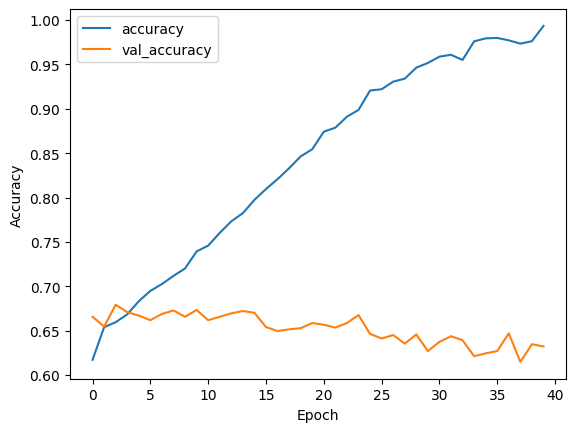

Epoch 1/10
243/243 [==============================] - 2s 4ms/step - loss: 0.6575 - accuracy: 0.6196 - val_loss: 0.6317 - val_accuracy: 0.6533
Epoch 2/10
243/243 [==============================] - 1s 3ms/step - loss: 0.6364 - accuracy: 0.6452 - val_loss: 0.6368 - val_accuracy: 0.6466
Epoch 3/10
243/243 [==============================] - 1s 3ms/step - loss: 0.6235 - accuracy: 0.6561 - val_loss: 0.6291 - val_accuracy: 0.6528
Epoch 4/10
243/243 [==============================] - 1s 4ms/step - loss: 0.6221 - accuracy: 0.6568 - val_loss: 0.6446 - val_accuracy: 0.6471
Epoch 5/10
243/243 [==============================] - 1s 5ms/step - loss: 0.6185 - accuracy: 0.6671 - val_loss: 0.6250 - val_accuracy: 0.6651
Epoch 6/10
243/243 [==============================] - 1s 6ms/step - loss: 0.6150 - accuracy: 0.6651 - val_loss: 0.6247 - val_accuracy: 0.6646
Epoch 7/10
243/243 [==============================] - 2s 10ms/step - loss: 0.6123 - accuracy: 0.6687 - val_loss: 0.6251 - val_accuracy: 0.6667
Epoch

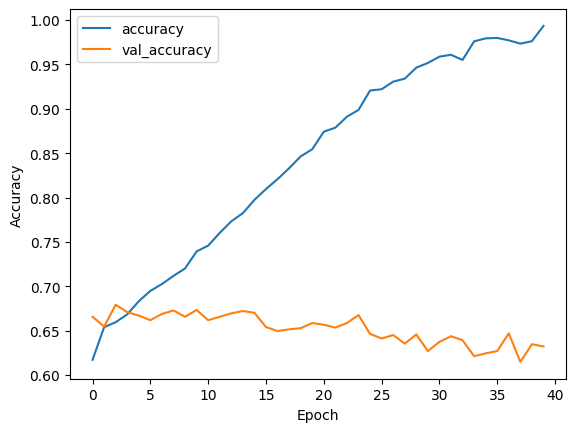

Epoch 1/10
243/243 [==============================] - 2s 6ms/step - loss: 0.6615 - accuracy: 0.6094 - val_loss: 0.6378 - val_accuracy: 0.6512
Epoch 2/10
243/243 [==============================] - 1s 4ms/step - loss: 0.6372 - accuracy: 0.6416 - val_loss: 0.6293 - val_accuracy: 0.6600
Epoch 3/10
243/243 [==============================] - 1s 4ms/step - loss: 0.6277 - accuracy: 0.6468 - val_loss: 0.6304 - val_accuracy: 0.6564
Epoch 4/10
243/243 [==============================] - 1s 4ms/step - loss: 0.6217 - accuracy: 0.6586 - val_loss: 0.6254 - val_accuracy: 0.6723
Epoch 5/10
243/243 [==============================] - 1s 6ms/step - loss: 0.6151 - accuracy: 0.6610 - val_loss: 0.6246 - val_accuracy: 0.6615
Epoch 6/10
243/243 [==============================] - 2s 7ms/step - loss: 0.6114 - accuracy: 0.6665 - val_loss: 0.6213 - val_accuracy: 0.6615
Epoch 7/10
243/243 [==============================] - 1s 4ms/step - loss: 0.6064 - accuracy: 0.6715 - val_loss: 0.6220 - val_accuracy: 0.6651
Epoch 

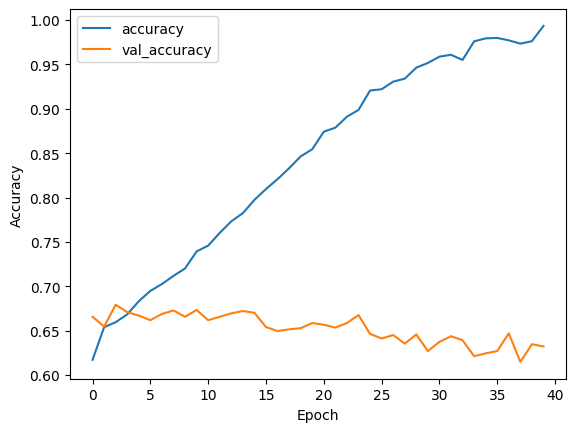

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.activations import relu, elu
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.layers import LeakyReLU


# Define the model architecture with different activation functions
def create_model(activation_func):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation_func, input_shape=(8, 10, 1)))
    model.add(MaxPooling2D((2, 2), padding='same'))  # Add padding to prevent negative dimensions
    model.add(Flatten())
    model.add(Dense(64, activation=activation_func))
    model.add(Dropout(0.5))  # Adding dropout layer to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    return model

# Define different activation functions to experiment with
activation_functions = ['relu', 'elu', LeakyReLU(alpha=0.1)]  # You can add more activation functions here

# Iterate over each activation function and train the model
for activation_func in activation_functions:
    model = create_model(activation_func)
    model.compile(optimizer=Adam(), loss=binary_crossentropy, metrics=['accuracy'])
    model.fit(X_train_clean, y_train_clean, epochs=10, batch_size=32, validation_data=(X_test_clean, y_test_clean))
    evaluate_model(model, X_test_scaled, y_test_clean)

    test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
    print("Test Accuracy:", test_accuracy)

    # Plot training history if needed
    import matplotlib.pyplot as plt

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [67]:
from keras.layers import BatchNormalization



# **RNN MODEL**

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 64)                19200     
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_65 (Dense)            (None, 64)                4160      
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_66 (Dense)            (None, 1)                 65        
                                                                 
Total params: 23425 (91.50 KB)
Trainable params: 23425 (91.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
110/11

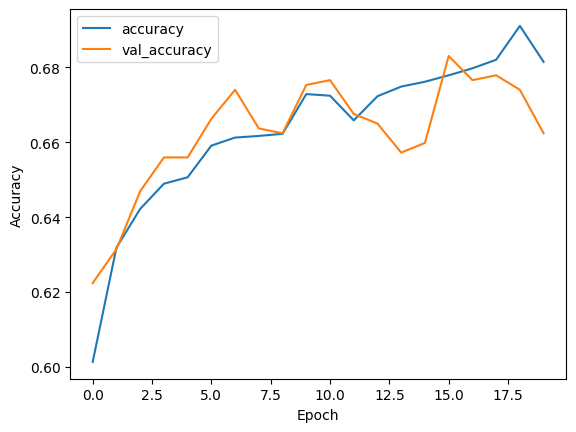

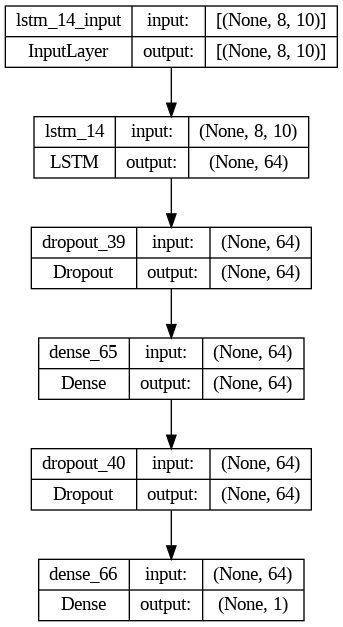

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

# Define the RNN model
def build_rnn_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dropout(0.5),
        Dense(64, activation='relu'),
         Dropout(0.5),

        Dense(num_classes, activation='sigmoid')
    ])
    return model

# Define model parameters
input_shape = (8, 10)  # Update with your input shape
num_classes = 1  # Update with the number of classes

# Build the model
model = build_rnn_model(input_shape, num_classes)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_clean, y_train_clean,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_clean, y_test_clean, verbose=1)
print("Test Accuracy:", test_acc)

# Make predictions
predictions = model.predict(X_test_clean)
evaluate_model(model, X_test_scaled, y_test_clean)

test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)

# Plot training history if needed


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 8, 64)             19200     
                                                                 
 dropout_41 (Dropout)        (None, 8, 64)             0         
                                                                 
 lstm_16 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_42 (Dropout)        (None, 32)                0         
                                                                 
 dense_67 (Dense)            (None, 64)                2112      
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_68 (Dense)            (None, 1)               

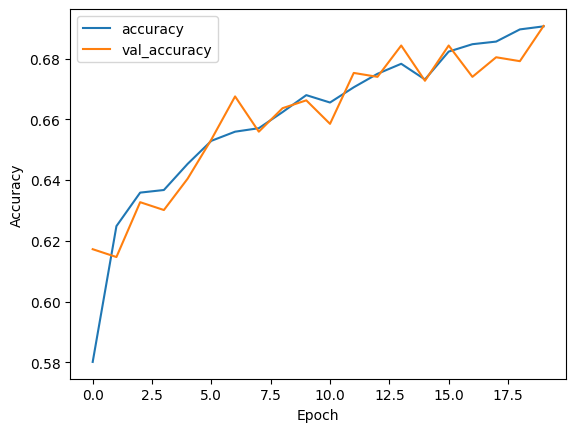

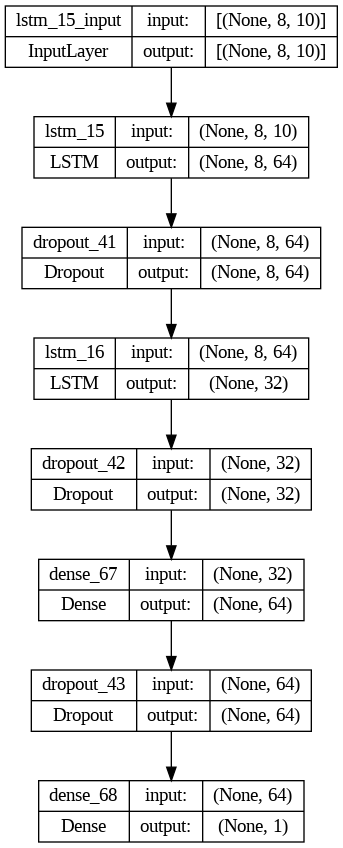

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

# Define the RNN model with additional layers
def build_rnn_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.5),
        LSTM(32),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    return model

# Define model parameters
input_shape = (8, 10)  # Update with your input shape
num_classes = 1  # Update with the number of classes

# Build the model
model = build_rnn_model(input_shape, num_classes)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_clean, y_train_clean,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_clean, y_test_clean, verbose=1)
print("Test Accuracy:", test_acc)

# Make predictions
predictions = model.predict(X_test_clean)
evaluate_model(model, X_test_scaled, y_test_clean)

test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)

# Plot training history if needed


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 64)                19200     
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                                 
 dense_69 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19265 (75.25 KB)
Trainable params: 19265 (75.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
110/110 [==============================] - 3s 10ms/step - loss: 0.6694 - accuracy: 0.5806 - val_loss: 0.6402 - val_accuracy: 0.6302
Epoch 2/20
110/110 [==============================] - 1s 6ms/step - loss: 0.6359 - accuracy: 0.6369 - val_loss: 0.6260 - val_accuracy: 0.6

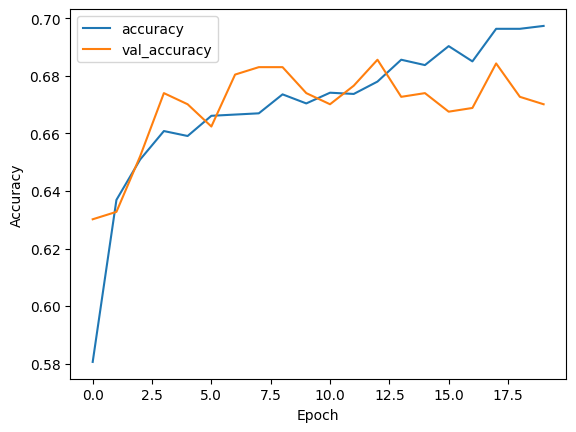

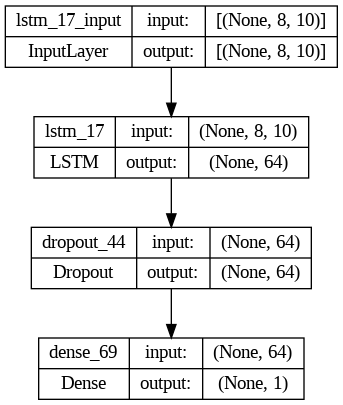

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the RNN model with reduced layers
def build_rnn_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    return model

# Define model parameters
input_shape = (8, 10)  # Update with your input shape
num_classes = 1  # Update with the number of classes

# Build the model
model = build_rnn_model(input_shape, num_classes)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_clean, y_train_clean,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_clean, y_test_clean, verbose=1)
print("Test Accuracy:", test_acc)

# Make predictions
predictions = model.predict(X_test_clean)
evaluate_model(model, X_test_scaled, y_test_clean)

test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)

# Plot training history if needed


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



In [40]:
pip install keras-tuner

In [41]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from kerastuner.tuners import RandomSearch

# Function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_lstm', min_value=32, max_value=128, step=32), input_shape=input_shape))
    model.add(Dropout(hp.Float('dropout_lstm', min_value=0.3, max_value=0.7, step=0.1)))
    model.add(Dense(units=hp.Int('units_dense', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_dense', min_value=0.3, max_value=0.7, step=0.1)))
    model.add(Dense(num_classes, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='my_project'
)

# Search for the best hyperparameters
tuner.search(X_train_clean, y_train_clean, epochs=20, validation_split=0.1)

# Get the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps)

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(X_train_clean, y_train_clean, epochs=20, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_acc)

# Print each trial information
print(tuner.results_summary())

<ipython-input-41-22a942ebe122>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Reloading Tuner from my_dir/my_project/tuner0.json
Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7f0a7f1a8400>
Epoch 1/20
219/219 [==============================] - 6s 13ms/step - loss: 0.6620 - accuracy: 0.6057 - val_loss: 0.6395 - val_accuracy: 0.6379
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.6385 - accuracy: 0.6377 - val_loss: 0.6254 - val_accuracy: 0.6559
Epoch 3/20
219/219 [==============================] - 2s 11ms/step - loss: 0.6303 - accuracy: 0.6473 - val_loss: 0.6213 - val_accuracy: 0.6482
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.6251 - accuracy: 0.6588 - val_loss: 0.6060 - val_accuracy: 0.6675
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.6203 - accuracy: 0.6586 - val_loss: 0.6044 - val_accuracy: 0.6817
Epoch 6/20
219/219 [==============================] - 2s 11ms/step - loss: 0.6152 - accuracy: 0.6592 - val_loss: 0

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np




Epoch 1/30
122/122 [==============================] - 4s 16ms/step - loss: 0.6481 - accuracy: 0.6281 - val_loss: 0.6388 - val_accuracy: 0.6455 - lr: 0.0010
Epoch 2/30
122/122 [==============================] - 2s 13ms/step - loss: 0.6224 - accuracy: 0.6537 - val_loss: 0.6267 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 3/30
122/122 [==============================] - 2s 19ms/step - loss: 0.6150 - accuracy: 0.6580 - val_loss: 0.6215 - val_accuracy: 0.6682 - lr: 0.0010
Epoch 4/30
122/122 [==============================] - 2s 15ms/step - loss: 0.6087 - accuracy: 0.6675 - val_loss: 0.6220 - val_accuracy: 0.6589 - lr: 0.0010
Epoch 5/30
122/122 [==============================] - 2s 13ms/step - loss: 0.6037 - accuracy: 0.6702 - val_loss: 0.6254 - val_accuracy: 0.6584 - lr: 0.0010
Epoch 6/30
122/122 [==============================] - 2s 14ms/step - loss: 0.6027 - accuracy: 0.6706 - val_loss: 0.6231 - val_accuracy: 0.6574 - lr: 0.0010
Epoch 7/30
122/122 [==============================] - 2s 13ms/st

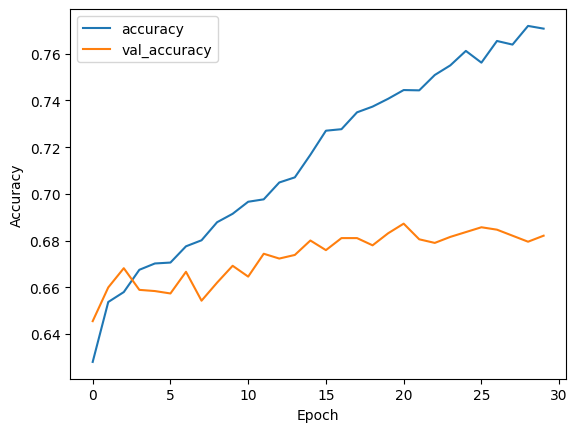

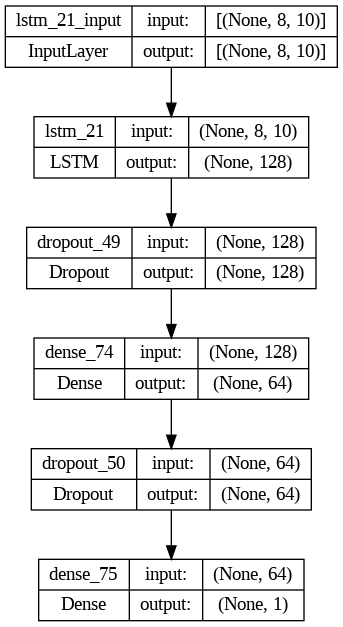

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Define the learning rate schedule
initial_learning_rate = 0.001
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)



# Define the model architecture
model = Sequential([
    LSTM(128, input_shape=(X_train_clean.shape[1], X_train_clean.shape[2])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with learning rate scheduling
history = model.fit(X_train_clean, y_train_clean, epochs=30, batch_size=64,
                    validation_data=(X_test_clean, y_test_clean),
                    callbacks=[LearningRateScheduler(lr_scheduler)])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)

evaluate_model(model, X_test_scaled, y_test_clean)

test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)

# Plot training history if needed


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



Epoch 1/100
122/122 [==============================] - 7s 28ms/step - loss: 0.6925 - accuracy: 0.5946 - val_loss: 0.6817 - val_accuracy: 0.6002 - lr: 0.0010
Epoch 2/100
122/122 [==============================] - 3s 22ms/step - loss: 0.6652 - accuracy: 0.6101 - val_loss: 0.6708 - val_accuracy: 0.6203 - lr: 0.0010
Epoch 3/100
122/122 [==============================] - 3s 27ms/step - loss: 0.6539 - accuracy: 0.6220 - val_loss: 0.6520 - val_accuracy: 0.6358 - lr: 0.0010
Epoch 4/100
122/122 [==============================] - 3s 22ms/step - loss: 0.6467 - accuracy: 0.6300 - val_loss: 0.6375 - val_accuracy: 0.6466 - lr: 0.0010
Epoch 5/100
122/122 [==============================] - 3s 23ms/step - loss: 0.6397 - accuracy: 0.6403 - val_loss: 0.6308 - val_accuracy: 0.6538 - lr: 0.0010
Epoch 6/100
122/122 [==============================] - 3s 23ms/step - loss: 0.6297 - accuracy: 0.6465 - val_loss: 0.6263 - val_accuracy: 0.6553 - lr: 0.0010
Epoch 7/100
122/122 [==============================] - 3s 

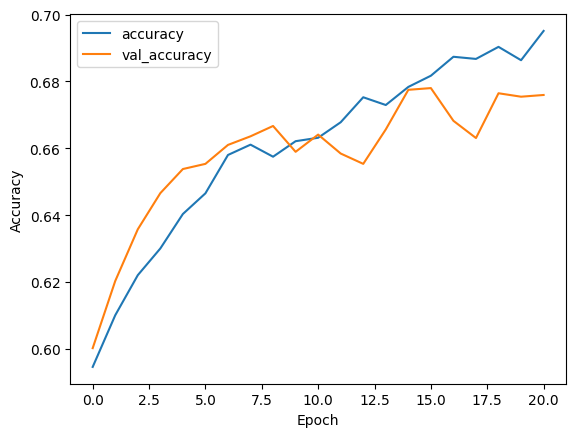

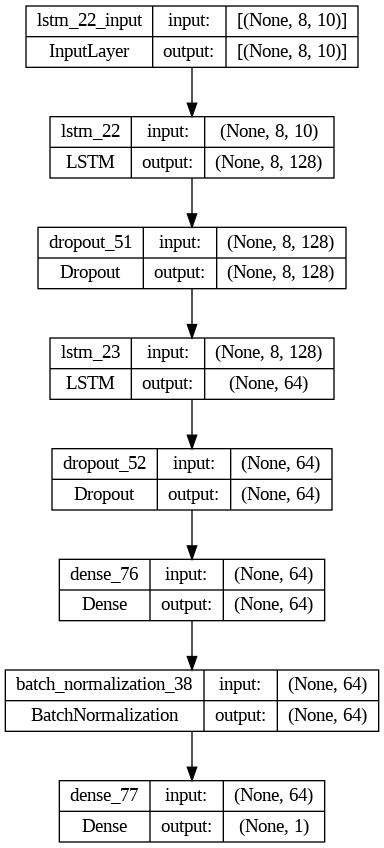

In [64]:
from tensorflow.keras.layers import BatchNormalization

# Define the learning rate schedule
initial_learning_rate = 0.001
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the model architecture with adjustments
model = Sequential([
    LSTM(128, input_shape=(X_train_clean.shape[1], X_train_clean.shape[2]), return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with learning rate scheduling and early stopping
history = model.fit(X_train_clean, y_train_clean, epochs=100, batch_size=64,
                    validation_data=(X_test_clean, y_test_clean),
                    callbacks=[LearningRateScheduler(lr_scheduler),
                               EarlyStopping(monitor='val_loss', patience=5)])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)
evaluate_model(model, X_test_scaled, y_test_clean)

test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)

# Plot training history if needed


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



Epoch 1/100
122/122 [==============================] - 7s 27ms/step - loss: 0.6853 - accuracy: 0.5927 - val_loss: 0.6781 - val_accuracy: 0.6105
Epoch 2/100
122/122 [==============================] - 3s 21ms/step - loss: 0.6620 - accuracy: 0.6115 - val_loss: 0.6644 - val_accuracy: 0.6007
Epoch 3/100
122/122 [==============================] - 3s 26ms/step - loss: 0.6544 - accuracy: 0.6157 - val_loss: 0.6588 - val_accuracy: 0.6213
Epoch 4/100
122/122 [==============================] - 3s 23ms/step - loss: 0.6533 - accuracy: 0.6218 - val_loss: 0.6642 - val_accuracy: 0.6110
Epoch 5/100
122/122 [==============================] - 3s 21ms/step - loss: 0.6510 - accuracy: 0.6173 - val_loss: 0.6530 - val_accuracy: 0.6260
Epoch 6/100
122/122 [==============================] - 3s 21ms/step - loss: 0.6478 - accuracy: 0.6299 - val_loss: 0.6572 - val_accuracy: 0.6157
Epoch 7/100
122/122 [==============================] - 3s 22ms/step - loss: 0.6489 - accuracy: 0.6263 - val_loss: 0.6668 - val_accuracy:

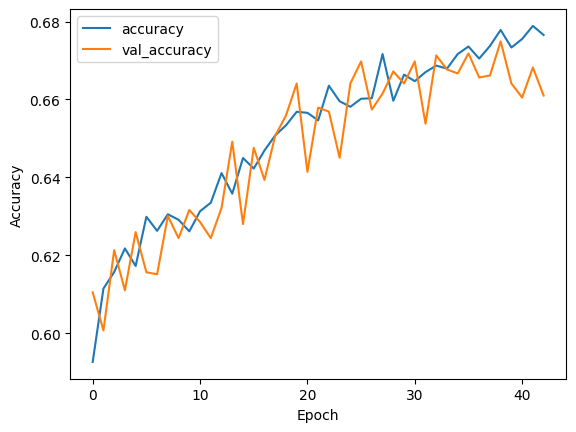

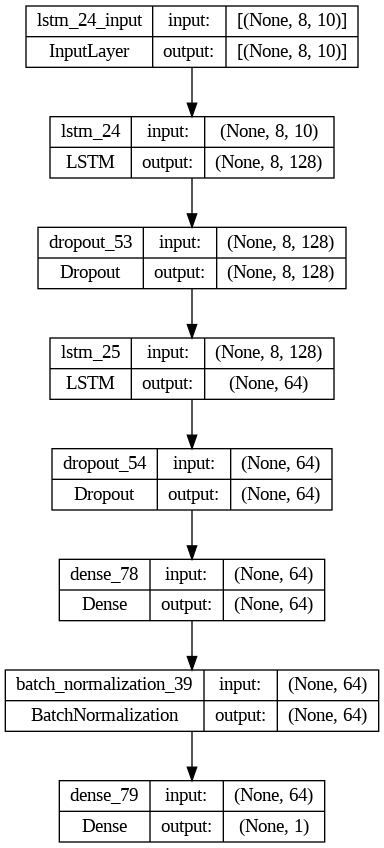

In [65]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture with adjustments
model = Sequential([
    LSTM(128, input_shape=(X_train_clean.shape[1], X_train_clean.shape[2]), return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
model.compile(optimizer=SGD(lr=0.01, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with learning rate scheduling and early stopping
history = model.fit(X_train_clean, y_train_clean, epochs=100, batch_size=64,
                    validation_data=(X_test_clean, y_test_clean),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)
evaluate_model(model, X_test_scaled, y_test_clean)

test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)

# Plot training history if needed


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



# **FINAL MODEL**

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 8, 64)             19200     
                                                                 
 dropout_55 (Dropout)        (None, 8, 64)             0         
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_56 (Dropout)        (None, 32)                0         
                                                                 
 dense_80 (Dense)            (None, 64)                2112      
                                                                 
 dropout_57 (Dropout)        (None, 64)                0         
                                                                 
 dense_81 (Dense)            (None, 1)               

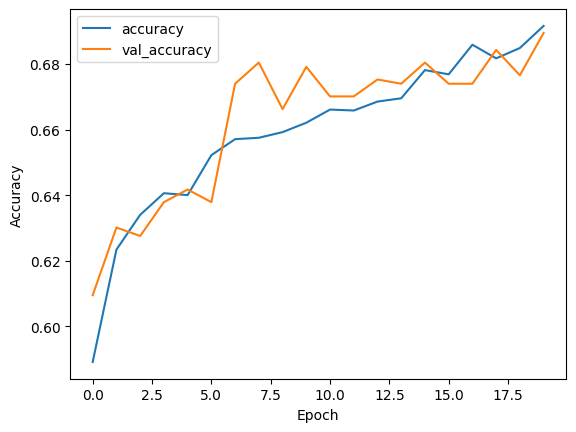

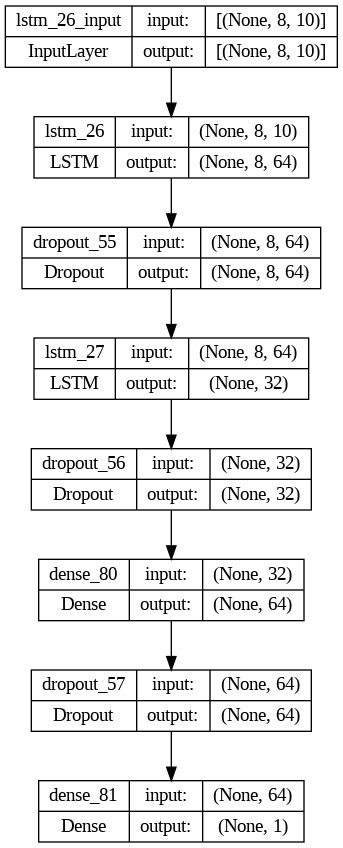

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

# Define the RNN model with additional layers
def build_rnn_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.5),
        LSTM(32),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    return model

# Define model parameters
input_shape = (8, 10)  # Update with your input shape
num_classes = 1  # Update with the number of classes

# Build the model
model = build_rnn_model(input_shape, num_classes)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_clean, y_train_clean,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_clean, y_test_clean, verbose=1)
print("Test Accuracy:", test_acc)

# Make predictions
predictions = model.predict(X_test_clean)
evaluate_model(model, X_test_scaled, y_test_clean)

test_loss, test_accuracy = model.evaluate(X_test_clean, y_test_clean)
print("Test Accuracy:", test_accuracy)

# Plot training history if needed


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
